In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from matplotlib import interactive
import math
%matplotlib notebook

In [43]:
def sigmoid(t,a,b,c,d=None):
    """ return the value of sigmoid for t """
    # t, time
    # a,b,c,d sigmoid parameters
    if d==None:
        d=0.
    return a+(d-a)/(1.+math.exp(-b*(t-c)))

def sigabcd(t,a,b,c,d):
    return np.array([sigmoid(ti,a,b,c,d) for ti in t])

def fap(t,kap,tp,sp,tm,sm):
    return kap*(1.-sigmoid(t,1.,sp,tp,0.))*sigmoid(t,1.,sm,tm,0.)

def fapt(t,kap,tp,sp,tm,sm):
    return np.array([fap(ti,kap,tp,sp,tm,sm) for ti in t])


In [44]:
def prepare_param_and_arrays(val_arg):
    [a_alpha,b_alpha,c_alpha,d_alpha,a_beta,b_beta,c_beta,d_beta,a_delta,b_delta,c_delta,d_delta,a_gamma,b_gamma,c_gamma,d_gamma,d_dAPb,Tstart,Tend,T1G1,T1S,T1G2,T1M,T2G1,T2S,T2G2,T2M,Nm]=val_arg
    Nm = int(Nm)   # number of mesh points in the shorter phase (usually M)
    T1_cycle =T1G1+T1S+T1G2+T1M
    T2_cycle =T2G1+T2S+T2G2+T2M
    
    list_arrays=prepare_arrays(T1_cycle,T1M,T2_cycle,Nm,Tstart,Tend)
    return list_arrays


In [45]:
def prepare_arrays(T1_cycle,T1M,T2_cycle,Nm,Tstart,Tend):
    
    Na_1=int(math.floor(Nm*T1_cycle/T1M))
    da_1=T1_cycle/Na_1
    T = Tend-Tstart # simulation length (day)
    dt=da_1
    Nt=int(math.floor(T*24./dt))+1
    #print "Na_1,da_1,dt,Nt ",Na_1,da_1,dt,Nt
    t_ = Tstart*np.ones(Nt+1)+dt*np.arange(Nt+1)/24.
    #print "t_",t_

    da_2=dt
    Na_2=int(math.floor(T2_cycle/da_2))+1
    ca_2=(Na_2*da_2-T2_cycle)/da_2
    
    a1_=da_1*np.arange(Na_1+1)
    a2_=da_2*np.arange(Na_2+1)
    a2_[Na_2]=T2_cycle
    
    IP1  = np.zeros(Nt+1)
    
    IP1a = np.zeros(Na_1+1)
    IP1w = np.zeros(Na_1+1)
    
    
    IP2  = np.zeros(Nt+1)
    IP2a = np.zeros(Na_2+1)
    IP2w = np.zeros(Na_2+1)
    
    N  = np.zeros(Nt+1)
    N_AP  = np.zeros(Nt+1)
    alpha_  = np.zeros(Nt+1)
    beta_   = np.zeros(Nt+1)
    gamma_  = np.zeros(Nt+1)
    delta_  = np.zeros(Nt+1)
    
    IP1G1  = np.zeros(Nt+1)
    IP1S  = np.zeros(Nt+1)
    IP1G2  = np.zeros(Nt+1)
    IP1M  = np.zeros(Nt+1)
    IP2G1  = np.zeros(Nt+1)
    IP2S  = np.zeros(Nt+1)
    IP2G2  = np.zeros(Nt+1)
    IP2M  = np.zeros(Nt+1)
    return dt,da_1,da_2,Nt,Na_1,Na_2,ca_2,t_,alpha_,beta_,gamma_,delta_,a1_,a2_,IP1,IP1G1,IP1S,IP1G2,IP1M,IP1a,IP1w,IP2,IP2G1,IP2S,IP2G2,IP2M,IP2a,IP2w,N,N_AP


In [46]:
def compute_sol(input_arg):
    T1G1=20.9
    T1S=6.4
    T1G2=1.6
    T1M=0.5
    
    T2G1=21.3
    T2S=2.8
    T2G2=1.6
    T2M=0.5
    
    K_AP=8.
    alpha_0=1.
    alpha_1=0.
    s_alpha=3.34
    t_alpha=11.84
    
    beta_0=1
    beta_1=1.
    t_beta=25.
    s_beta=1.
    
    t_gamma=14.
    gamma_1=1.
    s_gamma=10.
    gamma_0=0.5
    
    delta_0=1.
    delta_1=0.
    t_delta=16.71
    s_delta=2.80
    [K_AP,t_alpha,s_alpha,t_delta,s_delta,gamma_0,s_gamma,t_gamma,gamma_1,beta_0,s_beta,t_beta,beta_1]=input_arg
    
    Nm=5
    Tstart=9.
    Tend=20.
    
    val_arg=[alpha_0,s_alpha,t_alpha,alpha_1,beta_0,s_beta,t_beta,beta_1,delta_0,s_delta,t_delta,delta_1,gamma_0,s_gamma,t_gamma,gamma_1,K_AP,Tstart,Tend,T1G1,T1S,T1G2,T1M,T2G1,T2S,T2G2,T2M,Nm]
    T1C=(T1G1+T1S+T1G2+T1M)
    T2C=(T2G1+T2S+T2G2+T2M)
    t_exp=range(9,20)
    list_arrays=prepare_param_and_arrays(val_arg)
    t_=list_arrays[7]
    dt=list_arrays[0]
    da_1=list_arrays[1]
    Na_1=list_arrays[4]
    alpha_=list_arrays[8]
    beta_=list_arrays[9]
    gamma_=list_arrays[10]
    delta_=list_arrays[11]
    
    ntim=len(alpha_)
    t_=np.linspace(Tstart,Tend,ntim)
    alpha_=sigabcd(t_,alpha_0,s_alpha,t_alpha,alpha_1)
    beta_=sigabcd(t_,beta_0,s_beta,t_beta,beta_1)
    gamma_=sigabcd(t_,gamma_0,s_gamma,t_gamma,gamma_1)
    delta_=sigabcd(t_,delta_0,s_delta,t_delta,delta_1)
    F_AP_=K_AP*(1.-alpha_)*delta_
    F_AP_int=[0]
    for i in range(len(t_)-1):
        F_AP_int.append(F_AP_int[i]+dt*F_AP_[i])
    IP1=list_arrays[14]
    IP1S=list_arrays[16]
    IP1M=list_arrays[18]
    IP2=list_arrays[21]
    IP2S=list_arrays[23]
    IP2M=list_arrays[25]
    N=list_arrays[28]
    N_AP=list_arrays[29]
    return t_,IP1,IP1S,IP1M,IP2,IP2S,IP2M,N,N_AP,F_AP_int





# Neuromathmod


This notebook illustrates the model described in the article <br>
A MULTISCALE MATHEMATICAL MODEL OF NEUROGENESIS IN THE MOUSE CEREBRAL CORTEX<br>
Postel Marie<sup>1,2</sup><br>
Karam Alice<sup>3</sup><br>
Schneider-Maunoury Sylvie<sup>3</sup><br>
Clément Frédérique<sup>4,5</sup><br>
<bR>
<b>1</b> Sorbonne Université, Université Paris-Diderot SPC, CNRS, Laboratoire Jacques-Louis Lions, LJLL, F-75005 Paris, France
<br>
<b>2</b> CNRS, UMR 7598, Laboratoire Jacques-Louis Lions, F-75005, Paris, France 
<br>
<b>3</b> CNRS UMR 7622, INSERM U1156, Sorbonne Université Paris 06, Paris, France
<br>
<b>4</b> Inria, Universit\'e Paris-Saclay
<br>
<b>5</b> LMS, Ecole Polytechnique, CNRS, Universit\'e Paris-Saclay



We model the evolution during corticogenesis of three types of cells, apical progenitors (APs), intermediate progenitors (IPs) and neurons (Ns).  Neurons are post-mitotic cells, they do not divide. The model takes into account the distinct types of division made by progenitors and the time-dependent variations in their rates. <br>
The parameters of the model are the input flux of APs
$$F_{AP}(t)=K_{AP}\displaystyle\frac{e^{s_+(t-t_+)}}{(1+e^{s_+(t-t_+)})(1+e^{s_-(t-t_-)})}
$$
The non AP cell product of an asymmetric  AP division can be either an IP, with a rate $\beta(t)$ or a neuron, with a rate $1-\beta(t)$.
$$\beta(t)=\beta_1+\displaystyle\dfrac{\beta_0-\beta_1}{1+\displaystyle e^{s_\beta(t-t_\beta)}}, ~~ \mbox{with }~~s_\beta>0$$
The IPs divide symmetrically, either into two IPs in the case of proliferative IPs (IPPs), with a rate $\gamma(t)$ or into two neurons in the case of neurogenic IPs (IPNs), with a rate $1-\gamma(t)$.
$$\gamma(t)=\gamma_1+\displaystyle\dfrac{\gamma_0-\gamma_1}{1+\displaystyle e^{s_\gamma(t-t_\gamma)}},~~\mbox{with }s_\gamma>0
$$


Both IPP and IPN satisfy a transport equation
$$\left\{\begin{array}{l}\partial_t X(t,a)+\partial_a X(t,a)=0,\quad t>0,\\
X(0,a)=X_0(a),\end{array}\right.$$
with boundary conditions
$$IPP(t,0)=\gamma(t)\beta(t)F_{AP}(t)$$
$$IPN(t,0)=(1-\gamma(t))\beta(t)F_{AP}(t)+2IPP(t,T_C^{IPP})$$

The outputs of the model are the number of neurons
$$N(t)=\displaystyle\int_0^t\left((1-\beta(\tau))F_{AP}(\tau)+2IPN(\tau,T_C^{IPN})\right)d\tau
$$
The number of proliferative IPs
$$\overline{IPP}(t)=\int_0^{T_C^{IPP}}IPP(t,a)da$$
The number of neurogenic IPs
$$\overline{IPN}(t)=\int_0^{T_C^{IPN}}IPN(t,a)da$$



La figure montre les paramètres et sorties du modèle pour le jeu de paramètres suivant

<table border="1"><tr>
            <td>            </td><td colspan =5> $F_{AP}$                </td><td colspan=4>        $\gamma$  </td><td colspan=4>       $\beta$ </td><td></tr>
<tr><td>$T_C^{IPP}$ </td><td> $T_C^{IPN}$ </td><td>   $K_{AP}$</td><td> $s_+$ </td><td> $t_+$ </td><td>  $s_-$  </td><td> $t_-$  </td><td> $\gamma_0$</td><td> $\gamma_1$</td><td> $s_\gamma$</td><td> $t_\gamma$</td><td> $\beta_0$</td><td> $\beta_1$</td><td> $s_\beta$</td><td> $t_\beta$</td></tr>
<tr><td>29.2 </td><td>26.2 </td><td> 10 </td><td> 2 </td><td> 12 </td><td> 4 </td><td>16 </td><td>1 </td><td>0 </td><td>2 </td><td>14 </td><td> 1 </td><td>0.9 </td><td> 2 </td><td>14</td></Tr></table>

<ul>
<li> Panel A : les taux de division   $\gamma(t) $ et $\beta(t)$
<li> Panel B : Le flux entrant de cellules AP $F_{AP}(t)$
<li> Panel C : Le nombre cumulé  de cellules AP $\int_0^tF_{AP}(s)ds$
<li> Panel D : Le nombre de cellules IP $\overline{IP(t)}=\overline{IPN(t)}+\overline{IPP(t)}$
<li> Panel E : Le nombre de cellules IP proliférantes $\overline{IPP(t)}$
<li> Panel F : Le nombre de neurones $N(t)$
</ul>

En modifiant les paramètres de $\gamma(t)$, $\beta(t)$ et $F_{AP}(t)$ avec les réglettes, on fait apparaitre les sorties du modèle correspondant aux nouvelles valeurs, en bleu. Les sorties du modèle correspondant aux paramètres de référence sont en rouge.

<IPython.core.display.Javascript object>


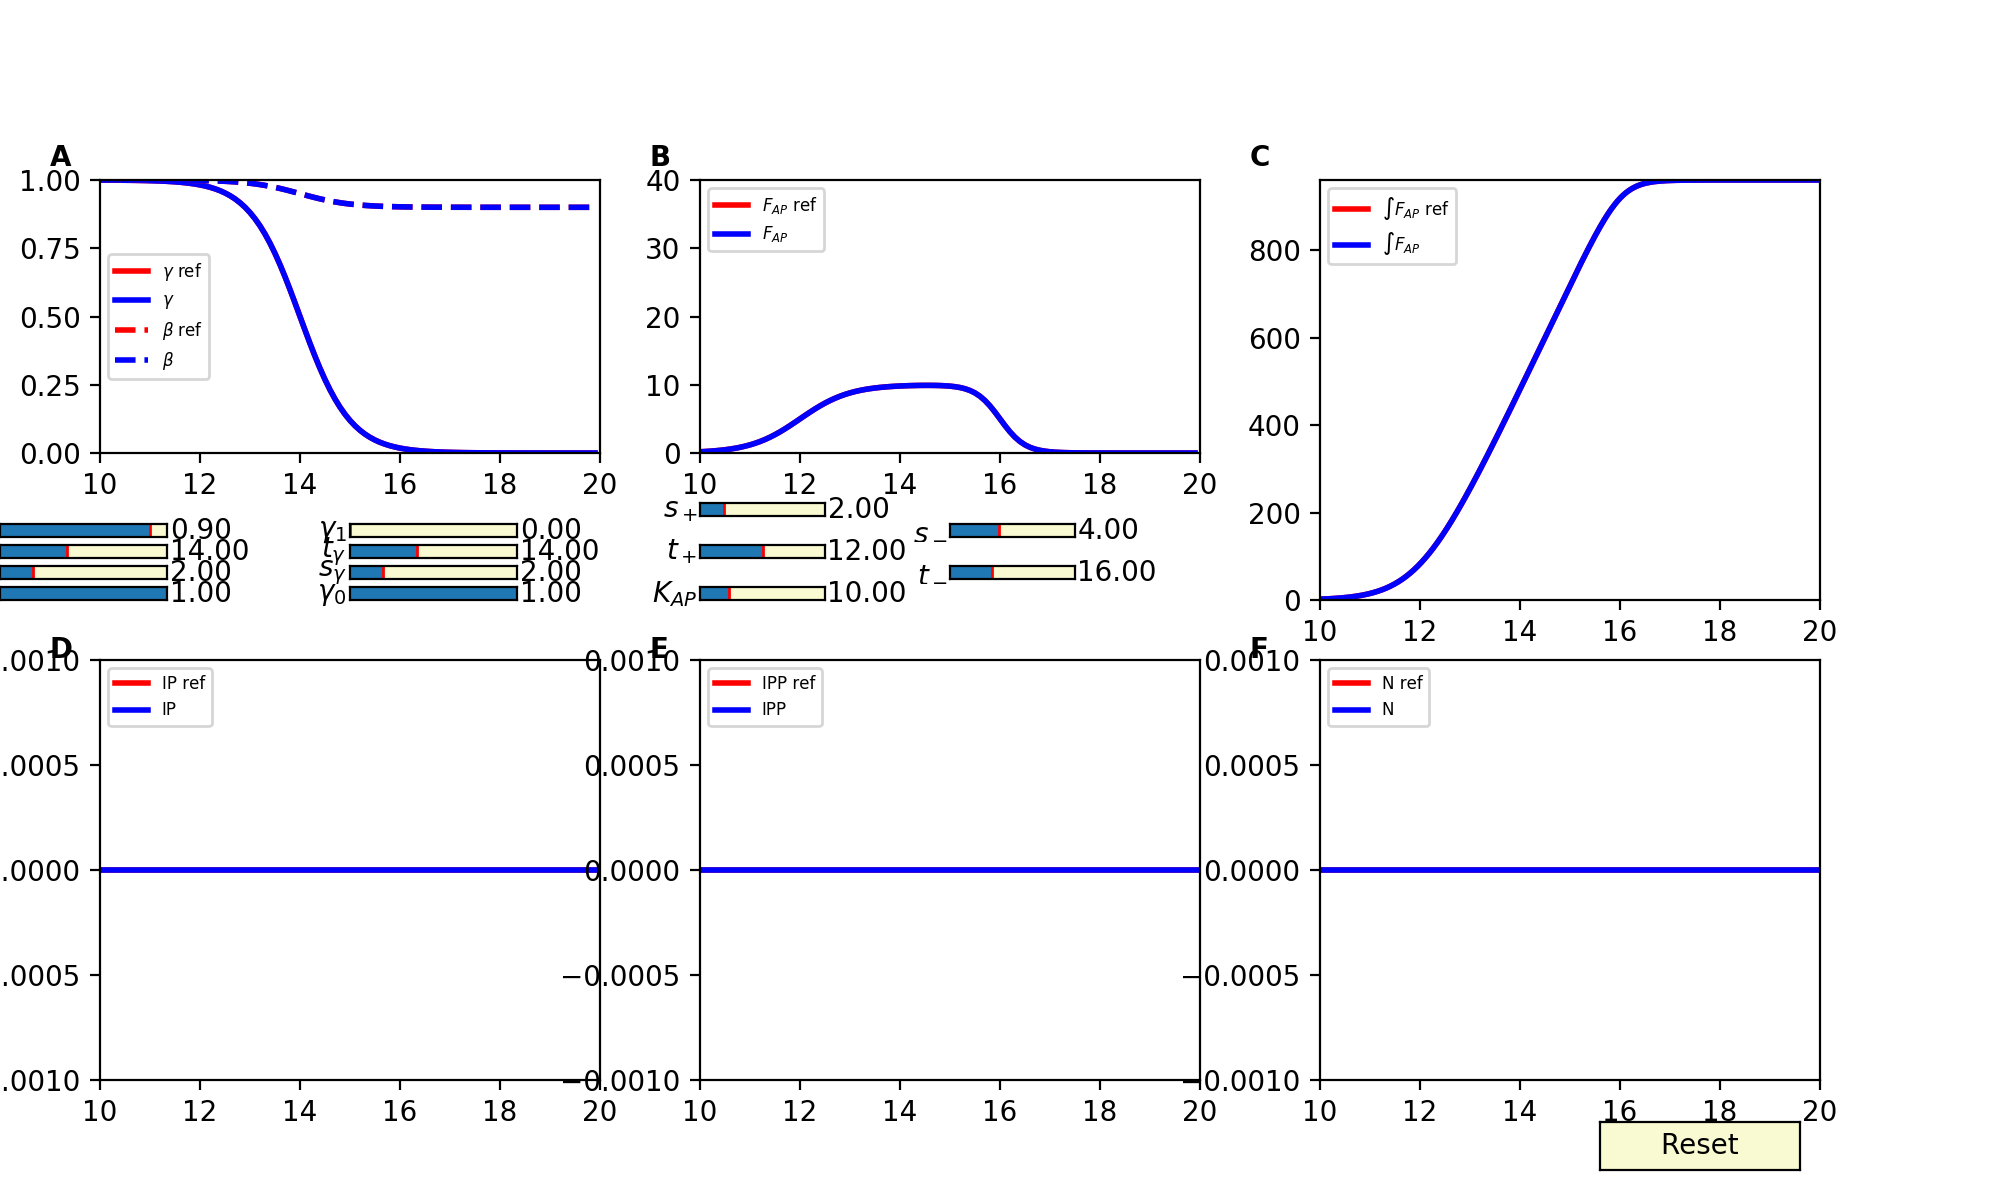

In [47]:
fig, ax = plt.subplots(figsize=(10,6))
vert=False
left_gamma=0.05
bottom_gamma=0.5
width_gamma=0.25
height_gamma=0.35

left_fap=0.35
bottom_fap=0.5
width_fap=0.25
height_fap=0.35

left_ip=0.05
bottom_ip=0.1
width_ip=0.25
height_ip=0.35

left_ipp=0.35
bottom_ipp=0.1
width_ipp=0.25
height_ipp=0.35

left_n=0.66
bottom_n=0.1
width_n=0.25
height_n=0.35

left_int=0.66
bottom_int=0.5
width_int=0.25
height_int=0.35




plt.subplots_adjust(left=left_gamma, bottom=bottom_gamma+0.35*height_gamma,right=left_gamma+width_gamma, top=bottom_gamma+height_gamma)

Tmax=20
Tmin=10
t = np.arange(Tmin, Tmax, 0.1)
gamma_0 = 1.
gamma_1 = 0.
t_gamma= 14.
s_gamma=2.
beta_0 = 1.
beta_1 = 0.9
t_beta= 14.
s_beta=2.
kapmax=40.
kap0=10.
tp0=12.
sp0=2
tm0=16.
sm0=4


(a0,b0,c0,d0)=(gamma_0,s_gamma,t_gamma,gamma_1)
sg = sigabcd(t,gamma_0,s_gamma,t_gamma,gamma_1)
plt.plot(t, sg, lw=2, color='red',label=r'$\gamma$ ref')
lgamma, = plt.plot(t, sg, lw=2, color='blue',label=r'$\gamma$')
(a0,b0,c0,d0)=(beta_0,s_beta,t_beta,beta_1)
sb = sigabcd(t,beta_0,s_beta,t_beta,beta_1)
plt.plot(t, sb, '--',lw=2, color='red',label=r'$\beta$ ref')
lbeta, = plt.plot(t, sb, '--',lw=2, color='blue',label=r'$\beta$')
plt.text(9.,1.05,'A', fontsize=10, fontweight='bold')
plt.text(21.,1.05,'B', fontsize=10, fontweight='bold')
plt.text(33.,1.05,'C', fontsize=10, fontweight='bold')
plt.text(9.,-0.75,'D', fontsize=10, fontweight='bold')
plt.text(21.,-0.75,'E', fontsize=10, fontweight='bold')
plt.text(33.,-0.75,'F', fontsize=10, fontweight='bold')
plt.legend(loc=6,prop={'size': 6})
plt.axis([Tmin, Tmax, 0., 1.])

s = fapt(t,kap0,tp0,sp0,tm0,sm0)
FAP = plt.axes([left_fap, bottom_fap+0.35*height_fap, width_fap, 0.65*height_fap], facecolor='white')
FAP.plot(t, s, lw=2, color='red', label=r'$F_{AP}$ ref')
lfap, = FAP.plot(t, s, lw=2, color='blue', label=r'$F_{AP}$')
FAP.legend(loc=2,prop={'size': 6})
FAP.axis([Tmin, Tmax, 0., kapmax])





var_arg=[kap0,tp0,sp0,tm0,sm0,gamma_0,s_gamma,t_gamma,gamma_1,beta_0,s_beta,t_beta,beta_1]
t_,IP1,IP1S,IP1M,IP2,IP2S,IP2M,N,N_AP,F_AP_int=compute_sol(var_arg)
plt_IP=plt.axes([left_ip, bottom_ip, width_ip, height_ip], facecolor='white')
plt_IP.plot(t_, IP1+IP2, lw=2, color='red',label='IP ref')
l_IP, = plt_IP.plot(t_, IP1+IP2, lw=2, color='blue',label='IP')
plt.legend(loc=2,prop={'size': 6})
plt_IP.set_xlim([Tmin, Tmax])
maxIP=max(IP1+IP2)

plt_IPP=plt.axes([left_ipp, bottom_ipp, width_ipp, height_ipp], facecolor='white')
plt_IPP.plot(t_, IP2, lw=2, color='red',label='IPP ref')
l_IPP, = plt_IPP.plot(t_, IP2, lw=2, color='blue',label='IPP')
plt.legend(loc=2,prop={'size': 6})
plt_IPP.set_xlim([Tmin, Tmax])
maxIPP=max(IP2)

plt_N=plt.axes([left_n, bottom_n, width_n, height_n], facecolor='white')
plt_N.plot(t_, N, lw=2, color='red',label='N ref')
l_N, = plt_N.plot(t_, N, lw=2, color='blue',label='N')
plt.legend(loc=2,prop={'size': 6})
plt_N.set_xlim([Tmin, Tmax])
maxN=max(N)

plt_FAP_int=plt.axes([left_int, bottom_int, width_int, height_int], facecolor='white')
plt_FAP_int.plot(t_, F_AP_int, lw=2, color='red',label=r'$\int F_{AP}$ ref')
l_int, = plt_FAP_int.plot(t_, F_AP_int, lw=2, color='blue',label=r'$\int F_{AP}$')
plt.legend(loc=2,prop={'size': 6})
plt_FAP_int.set_xlim([Tmin, Tmax])
maxfapint=max(F_AP_int)


xgamma=left_gamma+width_gamma/2
axcolor = 'lightgoldenrodyellow'
agxa0 = plt.axes([xgamma, bottom_gamma, width_gamma/3, 0.03*height_gamma], facecolor=axcolor)
agxb0 = plt.axes([xgamma, bottom_gamma+0.05*height_gamma, width_gamma/3, 0.03*height_gamma], facecolor=axcolor)
agxc0 = plt.axes([xgamma, bottom_gamma+0.1*height_gamma, width_gamma/3, 0.03*height_gamma], facecolor=axcolor)
agxd0 = plt.axes([xgamma, bottom_gamma+0.15*height_gamma, width_gamma/3, 0.03*height_gamma], facecolor=axcolor)

sga0 = Slider(agxa0, r'$\gamma_0$', 0., 1., valinit=gamma_0)
sgb0 = Slider(agxb0, r'$s_\gamma$', 0., 10.0, valinit=s_gamma)
sgc0 = Slider(agxc0, r'$t_\gamma$', 10., 20.0, valinit=t_gamma)
sgd0 = Slider(agxd0, r'$\gamma_1$', 0., 1., valinit=gamma_1)

def update_gamma(val):
    a = sga0.val
    b = sgb0.val
    c = sgc0.val
    d = sgd0.val
    lgamma.set_ydata(sigabcd(t,a,b,c,d))
    (gamma_0,s_gamma,t_gamma,gamma_1)=(a,b,c,d)
    var_arg=[kap0,tp0,sp0,tm0,sm0,gamma_0,s_gamma,t_gamma,gamma_1,beta_0,s_beta,t_beta,beta_1]
    t_,IP1,IP1S,IP1M,IP2,IP2S,IP2M,N,N_AP,F_AP_int=compute_sol(var_arg)
    l_IP.set_ydata(IP1+IP2)
    l_IPP.set_ydata(IP2)
    l_N.set_ydata(N)
    l_int.set_ydata(F_AP_int)
    plt_FAP_int.set_ylim([0, max(maxfapint,max(F_AP_int))])
    plt_N.set_ylim([0, max(max(N),maxN)])
    plt_IP.set_ylim([0, max(max(IP1+IP2),maxIP)])
    plt_IPP.set_ylim([0, max(max(IP2),maxIPP)])
    fig.canvas.draw_idle()

sga0.on_changed(update_gamma)
sgb0.on_changed(update_gamma)
sgd0.on_changed(update_gamma)
sgc0.on_changed(update_gamma)


axcolor = 'lightgoldenrodyellow'
xbeta=0.
abxa0 = plt.axes([xbeta, bottom_gamma, width_gamma/3, 0.03*height_gamma], facecolor=axcolor)
abxb0 = plt.axes([xbeta, bottom_gamma+0.05*height_gamma, width_gamma/3, 0.03*height_gamma], facecolor=axcolor)
abxc0 = plt.axes([xbeta, bottom_gamma+0.1*height_gamma, width_gamma/3, 0.03*height_gamma], facecolor=axcolor)
abxd0 = plt.axes([xbeta, bottom_gamma+0.15*height_gamma, width_gamma/3, 0.03*height_gamma], facecolor=axcolor)

sba0 = Slider(abxa0, r'$\beta_0$', 0., 1., valinit=beta_0)
sbb0 = Slider(abxb0, r'$s_\beta$', 0., 10.0, valinit=s_beta)
sbc0 = Slider(abxc0, r'$t_\beta$', 10., 20.0, valinit=t_beta)
sbd0 = Slider(abxd0, r'$\beta_1$', 0., 1., valinit=beta_1)

def update_beta(val):
    a = sba0.val
    b = sbb0.val
    c = sbc0.val
    d = sbd0.val
    lbeta.set_ydata(sigabcd(t,a,b,c,d))
    (beta_0,s_beta,t_beta,beta_1)=(a,b,c,d)
    var_arg=[kap0,tp0,sp0,tm0,sm0,gamma_0,s_gamma,t_gamma,gamma_1,beta_0,s_beta,t_beta,beta_1]
    t_,IP1,IP1S,IP1M,IP2,IP2S,IP2M,N,N_AP,F_AP_int=compute_sol(var_arg)
    l_IP.set_ydata(IP1+IP2)
    l_IPP.set_ydata(IP2)
    l_N.set_ydata(N)
    l_int.set_ydata(F_AP_int)
    plt_FAP_int.set_ylim([0, max(maxfapint,max(F_AP_int))])
    plt_N.set_ylim([0, max(max(N),maxN)])
    plt_IP.set_ylim([0, max(max(IP1+IP2),maxIP)])
    plt_IPP.set_ylim([0, max(max(IP2),maxIPP)])
    fig.canvas.draw_idle()
sba0.on_changed(update_beta)
sbb0.on_changed(update_beta)
sbd0.on_changed(update_beta)
sbc0.on_changed(update_beta)




axcolor = 'lightgoldenrodyellow'
xfap=left_fap
fxkap0 = plt.axes([xfap, bottom_fap, width_fap/4,0.03*height_fap], facecolor=axcolor)
fxtp0 = plt.axes([xfap, bottom_fap+0.1*height_fap, width_fap/4,0.03*height_fap], facecolor=axcolor)
fxsp0 = plt.axes([xfap, bottom_fap+0.2*height_fap, width_fap/4,0.03*height_fap], facecolor=axcolor)
fxtm0 = plt.axes([xfap+width_fap/2, bottom_fap+0.05*height_fap, width_fap/4,0.03*height_fap], facecolor=axcolor)
fxsm0 = plt.axes([xfap+width_fap/2, bottom_fap+0.15*height_fap, width_fap/4,0.03*height_fap], facecolor=axcolor)

fkap0 = Slider(fxkap0, r'$K_{AP}$', 1., kapmax, valinit=kap0)
ftp0 = Slider(fxtp0, r'$t_+$', 10., 14.0, valinit=tp0)
fsp0 = Slider(fxsp0, r'$s_+$', 0.1, 10.0, valinit=sp0)
ftm0 = Slider(fxtm0, r'$t_-$', 14., 20., valinit=tm0)
fsm0 = Slider(fxsm0, r'$s_-$', 0.1, 10., valinit=sm0)

def update_fap(val):
    kap= fkap0.val
    tp = ftp0.val
    sp = fsp0.val
    tm = ftm0.val
    sm = fsm0.val
    lfap.set_ydata(fapt(t,kap,tp,sp,tm,sm))
    var_arg=[kap,tp,sp,tm,sm,gamma_0,s_gamma,t_gamma,gamma_1,beta_0,s_beta,t_beta,beta_1]
    t_,IP1,IP1S,IP1M,IP2,IP2S,IP2M,N,N_AP,F_AP_int=compute_sol(var_arg)
    l_IP.set_ydata(IP1+IP2)
    l_IPP.set_ydata(IP2)
    l_N.set_ydata(N)
    l_int.set_ydata(F_AP_int)
    plt_FAP_int.set_ylim([0, max(maxfapint,max(F_AP_int))])
    plt_N.set_ylim([0, max(max(N),maxN)])
    plt_IP.set_ylim([0, max(max(IP1+IP2),maxIP)])
    plt_IPP.set_ylim([0, max(max(IP2),maxIPP)])
    
    fig.canvas.draw_idle()
fkap0.on_changed(update_fap)
ftp0.on_changed(update_fap)
fsp0.on_changed(update_fap)
ftm0.on_changed(update_fap)
fsm0.on_changed(update_fap)


resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sba0.reset()
    sbb0.reset()
    sbc0.reset()
    sbd0.reset()
    sga0.reset()
    sgb0.reset()
    sgc0.reset()
    sgd0.reset()
    fkap0.reset()
    ftp0.reset()
    fsp0.reset()
    ftm0.reset()
    fsm0.reset()
button.on_clicked(reset)



plt.show()
